# Checking Icenumerics and Magcolloids version

In this script we will check the more common functions and analysis in order to determine if we have the desired branch, we have downloaded the **master branch** (15.09.2021 commit: e4a0054). We will follow the basic instructions from https://aortiza.github.io/icenumerics/IceNumericsUsage.html.

We want to check if the program:

    1. Build a Colloidal Ice
    2. Run the simulation
    3. Build the vertices dataframe from the col object
    4. Read the .lammpstrj and obtain the vertices dataframe from it

In [1]:
import sys
import os
sys.path.insert(0, '../icenumerics')

import icenumerics as ice
from icenumerics.geometry import ordering 
import matplotlib.pyplot as plt
%matplotlib inline

import magcolloids as mgc

import tqdm.auto as tqdm

In [2]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-0.0"

##  1. Build a test Colloidal Ice

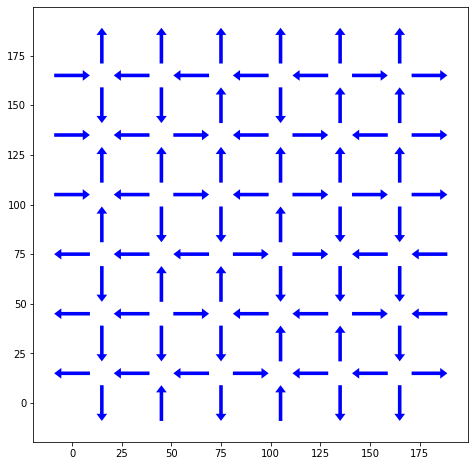

In [3]:
ureg = ice.ureg

sp = ice.spins()
l = 6
sp.create_lattice("square",[l,l],lattice_constant=30*ureg.um, border="closed vertex")
sp.order_spins(ordering.random_ordering)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

In [4]:
particle = ice.particle(radius = 5.15*ureg.um,
             susceptibility = 0.0576,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap = ice.trap(trap_sep = 10*ureg.um,
               height = 0.5*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

col = ice.colloidal_ice(sp, particle, trap, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(30*ureg.um)

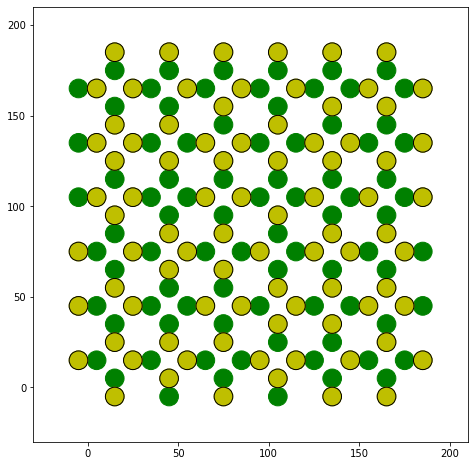

In [5]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
col.display(ax1)

##  2. Run simulation

In [6]:
world = ice.world(
    field = 10*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [7]:
col.simulate(world,
             name = "test",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = 60*ureg.s,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [8]:
col.trj

type      x      y    z  mux   muy       muz     t
frame id                                                     
0     1       1   15.0   -5.0  0.0  0.0   0.0  0.000877   0.0
      2       1   45.0    5.0  0.0  0.0   0.0  0.000877   0.0
      3       1   75.0   -5.0  0.0  0.0   0.0  0.000877   0.0
      4       1  105.0    5.0  0.0  0.0   0.0  0.000877   0.0
      5       1  135.0   -5.0  0.0  0.0   0.0  0.000877   0.0
...         ...    ...    ...  ...  ...   ...       ...   ...
59    164     2   45.0  180.0  0.0  0.0  10.0  0.000000  59.0
      165     2   75.0  180.0  0.0  0.0  10.0  0.000000  59.0
      166     2  105.0  180.0  0.0  0.0  10.0  0.000000  59.0
      167     2  135.0  180.0  0.0  0.0  10.0  0.000000  59.0
      168     2  165.0  180.0  0.0  0.0  10.0  0.000000  59.0

[10080 rows x 8 columns]

In [9]:
col.load_simulation(slice(0,None,1))

scanning file


##  3. Build dataframe from col object

We will try if we can obtain the dataframe with the elementary information of the vertices with this branch.

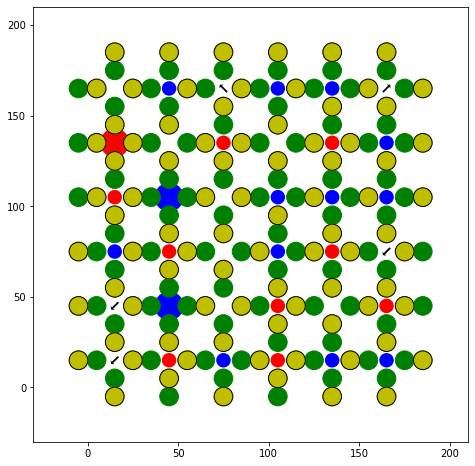

In [10]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
v = ice.vertices()
col.set_state_from_frame(0)
v = v.colloids_to_vertices(col)

v.display(ax1)
col.display(ax1)

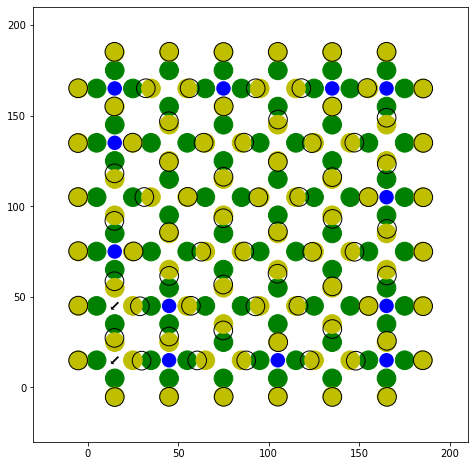

In [11]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
v = ice.vertices()
col.set_state_from_frame(50)
v = v.colloids_to_vertices(col)

v.display(ax1)
col.display(ax1)

In [12]:
v.vertices

,x,y,coordination,charge,dx,dy
0,15.0,45.0,4,0,-2.0,-2.0
1,165.0,135.0,4,0,0.0,0.0
2,165.0,75.0,4,0,0.0,0.0
3,45.0,165.0,4,0,0.0,0.0
4,15.0,75.0,4,-2,-2.0,0.0
5,15.0,105.0,4,0,0.0,0.0
6,105.0,165.0,4,0,0.0,0.0
7,45.0,15.0,4,-2,0.0,-2.0
8,15.0,15.0,4,0,-2.0,-2.0
9,165.0,45.0,4,-2,2.0,0.0


In [13]:
import pandas as pd

In [14]:
col.load_simulation(slice(0,None,1))

frames = col.trj.index.get_level_values("frame").unique()

v_df = []

for f in tqdm.tqdm(frames[::1]):
    col.set_state_from_frame(f)
    v = ice.vertices()
    v = v.colloids_to_vertices(col)

    v_df.append(v.vertices)

v_df = pd.concat(v_df, keys=frames[::1], names = ["frame"])

scanning file


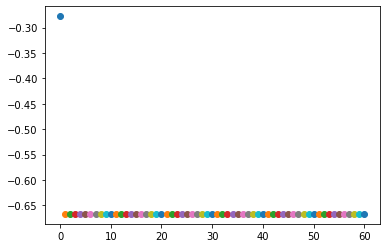

In [15]:
for i, inc in v_df.groupby('frame'):
    plt.plot(i, inc.charge.mean(), 'o')

##  4. Read .lammpstrj and build the vertices dataframe

In [16]:
load_obj = mgc.trj_lazyread(os.path.join(output,"test.lammpstrj"), output = ["x","y","z","mux","muy","muz"])

In [17]:
bnd = load_obj.get_bounds()
trj = load_obj.read_trj()

In [18]:
trj

type      x      y    z  mux   muy       muz
frame id                                               
0     1       1   15.0   -5.0  0.0  0.0   0.0  0.000877
      2       1   45.0    5.0  0.0  0.0   0.0  0.000877
      3       1   75.0   -5.0  0.0  0.0   0.0  0.000877
      4       1  105.0    5.0  0.0  0.0   0.0  0.000877
      5       1  135.0   -5.0  0.0  0.0   0.0  0.000877
...         ...    ...    ...  ...  ...   ...       ...
6000  164     2   45.0  180.0  0.0  0.0  10.0  0.000000
      165     2   75.0  180.0  0.0  0.0  10.0  0.000000
      166     2  105.0  180.0  0.0  0.0  10.0  0.000000
      167     2  135.0  180.0  0.0  0.0  10.0  0.000000
      168     2  165.0  180.0  0.0  0.0  10.0  0.000000

[10248 rows x 7 columns]

In [19]:
col_trj = ice.get_ice_trj(trj,bnd)


In [20]:
col_trj

type      x      y    z   dx    dy   dz        cx        cy   cz
frame id                                                                  
0     1      2   15.0    0.0  0.0  0.0 -10.0  0.0  0.000000 -5.000000  0.0
      2      2   45.0    0.0  0.0 -0.0  10.0 -0.0  0.000000  5.000000  0.0
      3      2   75.0    0.0  0.0  0.0 -10.0  0.0  0.000000 -5.000000  0.0
      4      2  105.0    0.0  0.0 -0.0  10.0 -0.0  0.000000  5.000000  0.0
      5      2  135.0    0.0  0.0  0.0 -10.0  0.0  0.000000 -5.000000  0.0
...        ...    ...    ...  ...  ...   ...  ...       ...       ...  ...
6000  80     2   45.0  180.0  0.0  0.0  10.0  0.0  0.065201  5.235001  0.0
      81     2   75.0  180.0  0.0  0.0  10.0  0.0  0.017899  5.050003  0.0
      82     2  105.0  180.0  0.0  0.0  10.0  0.0  0.085999  5.072006  0.0
      83     2  135.0  180.0  0.0  0.0  10.0  0.0  0.046997  5.229004  0.0
      84     2  165.0  180.0  0.0  0.0  10.0  0.0  0.054001  5.056000  0.0

[5124 rows x 10 columns]

In [21]:
## Infer Vertices
frames = col_trj.index.get_level_values("frame").unique()

v = ice.vertices()
v.trj_to_vertices(col_trj.loc[frames[::10]])

In [22]:
v.vertices

x      y  coordination  charge   dx   dy
frame                                                 
0     0    15.0   45.0             4       0 -2.0 -2.0
      1   165.0  135.0             4      -2  0.0  2.0
      2   165.0   75.0             4       0 -2.0 -2.0
      3    45.0  165.0             4      -2 -2.0  0.0
      4    15.0   75.0             4      -2 -2.0  0.0
...         ...    ...           ...     ...  ...  ...
6000  31  105.0  135.0             4       0  0.0  0.0
      32  135.0  105.0             4       0  0.0  0.0
      33   45.0  135.0             4       0  0.0  0.0
      34  135.0  135.0             4       0  0.0  0.0
      35   75.0  135.0             4       0  0.0  0.0

[252 rows x 6 columns]